In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

## Dicionário de dados

In [79]:
dicionário = {
    'sex': ['sexo',"categorica 0 - 1"],
    'age': ['idade', "continua"],
    'famsize': ['tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário', "categorica 0 - 1"],
    'Pstatus': ['status de habitação com os pais; T - mora junto com os pais, A - mora separado;', "categorica 0 - 1"],
    'traveltime': ['tempo de viagem entre escola e casa; 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora', "categorica ordinal"],
    'studytime': ['tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas', "categorica ordinal"],
    'schoolsup': ['suporte educacional extra escola', "categorica 0 - 1"],
    'famsup': ['suporte educacional da família', "categorica 0 - 1"],
    'paid': ['pagou aulas particulares por fora', "categorica 0 - 1"],
    'activities': ['atividades extra-curriculares', "categorica 0 - 1"],
    'internet': ['acesso a internet em casa', "categorica 0 - 1"],
    'romantic': ['se está num relacionamento', "categorica 0 - 1"],
    'famrel': ['qualidade das relações familiares; 1 - muito ruim a 5 - muito boa', "categorica ordinal"],
    'freetime': ['tempo livre após escola; 1 - muito pouco até 5 - muito', "categorica ordinal"],
    'goout': ['relaciona-se com amigos; 1 - muito pouco até 5 - muito', "categorica ordinal"],
    'absences': ['quantidade de faltas na escola', "continua"],
    'G3': ['nota média final no ensino médio', "continua"],
}

In [80]:
def DataFrame(dicio):
    dados = {   
        'Variavel' : [x for x in dicionário],
        'Descrição' : [x[0] for x in dicionário.values()],
        'Tipo' : [x[1] for x in dicionário.values()]
            }
 
    df = pd.DataFrame(data = dados)
                    
    return df

In [81]:
Dicionário_de_Dados = DataFrame(dicionário)
Dicionário_de_Dados

,Variavel,Descrição,Tipo
0,sex,sexo,categorica 0 - 1
1,age,idade,continua
2,famsize,tamanho da família; LE3 - famílias com no máxi...,categorica 0 - 1
3,Pstatus,status de habitação com os pais; T - mora junt...,categorica 0 - 1
4,traveltime,tempo de viagem entre escola e casa; 1 - <15 m...,categorica ordinal
5,studytime,"tempo de estudo semanal; 1 - <2 horas, 2 - 2 a...",categorica ordinal
6,schoolsup,suporte educacional extra escola,categorica 0 - 1
7,famsup,suporte educacional da família,categorica 0 - 1
8,paid,pagou aulas particulares por fora,categorica 0 - 1
9,activities,atividades extra-curriculares,categorica 0 - 1


### Análise Exploratória

In [82]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'famsize'}>,
        <AxesSubplot:title={'center':'Pstatus'}>],
       [<AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'famsup'}>],
       [<AxesSubplot:title={'center':'paid'}>,
        <AxesSubplot:title={'center':'activities'}>,
        <AxesSubplot:title={'center':'internet'}>,
        <AxesSubplot:title={'center':'romantic'}>],
       [<AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'absences'}>],
       [<AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

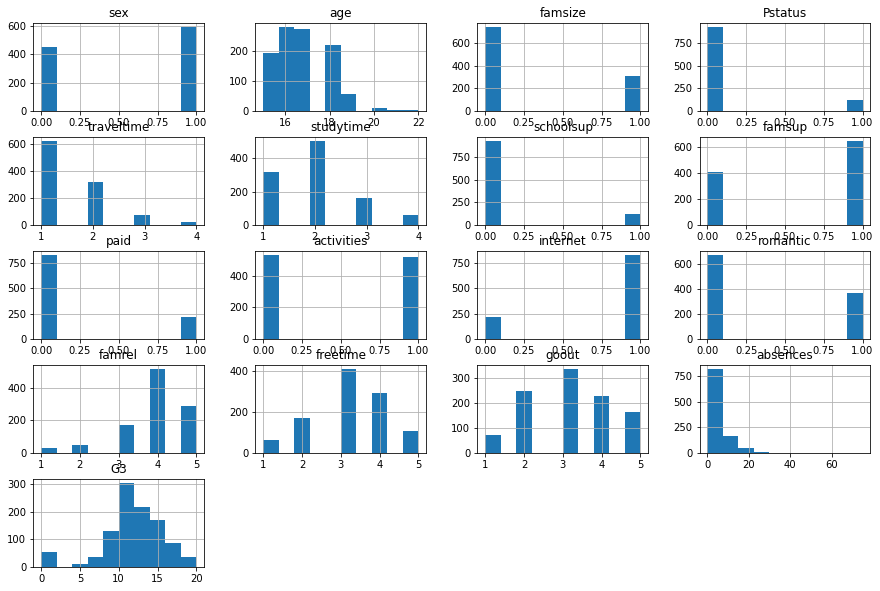

In [114]:
df.hist(figsize=[15,10])

In [83]:
df.sex.value_counts()*100/df.sex.shape[0]

F    56.609195
M    43.390805
Name: sex, dtype: float64

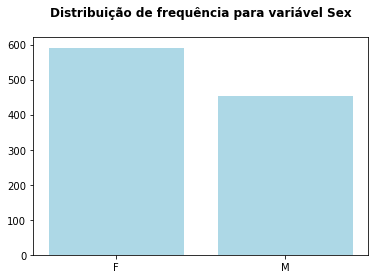

In [84]:
plt.title('Distribuição de frequência para variável Sex\n', {'fontsize': 12,'fontweight': 'bold'})
plt.bar(df.sex.unique(), df.sex.value_counts(), color = 'lightblue')

plt.show()

- 56% dos alunos do conjunto de dados são pessoas do sexo feminino 

In [85]:
df.age.describe()

count    1044.000000
mean       16.726054
std         1.239975
min        15.000000
25%        16.000000
50%        17.000000
75%        18.000000
max        22.000000
Name: age, dtype: float64

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64


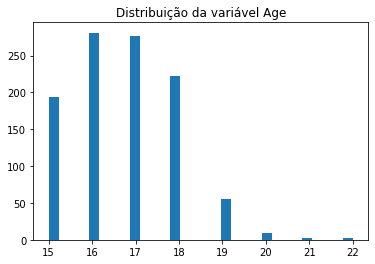

In [86]:
print(df.age.value_counts())
plt.hist(df.age, bins = 30)
plt.title("Distribuição da variável Age")
plt.show()

#### Observações

- A age visualmente parece ter uma concentração maior nas idades de 16 a 18 anos, e a partir dos 18 anos o padrão dos dados
é de queda, possivelmente pela idade de termino das atividades escolares (ensino médio).

- A variavel Age possui outlier, vai ser considerada caso o prosseguimento da análise nos aponte um possivel insight

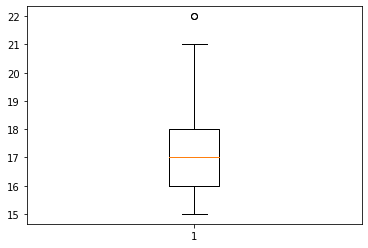

In [87]:
plt.boxplot(df.age)
plt.show()

- Distribuição das idades, demonstra que as idades mais numerosas estão entre 15 a 18 anos 
- Variavel possui um valor discrepante (outlier)

GT3    70.689655
LE3    29.310345
Name: famsize, dtype: float64


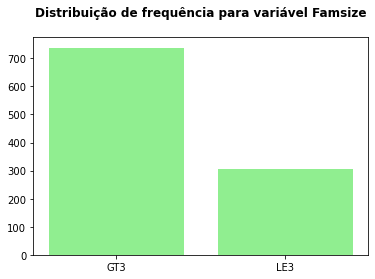

In [88]:
print(df.famsize.value_counts()*100/df.shape[0])
plt.title('Distribuição de frequência para variável Famsize\n', {'fontsize': 12,'fontweight': 'bold'})
plt.bar(df.famsize.unique(), df.famsize.value_counts(), color = 'lightgreen')

plt.show()

- 70 das familias possuem mais de 3 pessoas

T    88.409962
A    11.590038
Name: Pstatus, dtype: float64


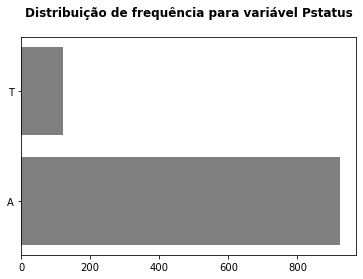

In [89]:
print(df.Pstatus.value_counts()/df.shape[0]*100)
plt.title('Distribuição de frequência para variável Pstatus\n', {'fontsize': 12,'fontweight': 'bold'})
plt.barh(df.Pstatus.unique(), df.Pstatus.value_counts(), color = 'gray')

plt.show()

- 88 por cento mora junto com os pais

Observação do tempo gasto de deslocamento feito pelos alunos
1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64


<AxesSubplot:>

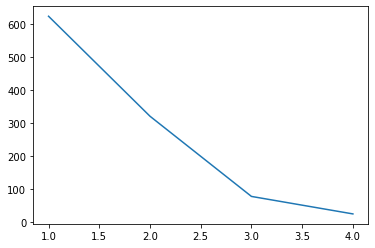

In [90]:
print("Observação do tempo gasto de deslocamento feito pelos alunos")
print(df.traveltime.value_counts())
df.traveltime.value_counts().plot()

Observação do tempo de estudo semanal
2    503
1    317
3    162
4     62
Name: studytime, dtype: int64


<AxesSubplot:>

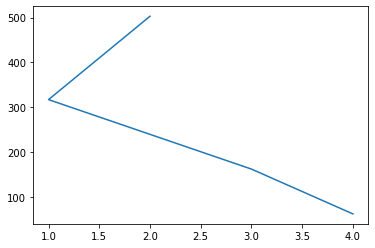

In [91]:
print("Observação do tempo de estudo semanal")
print(df.studytime.value_counts())
df.studytime.value_counts().plot()

Observação da qualidade das relações familiares
4    512
5    286
3    169
2     47
1     30
Name: famrel, dtype: int64


<AxesSubplot:>

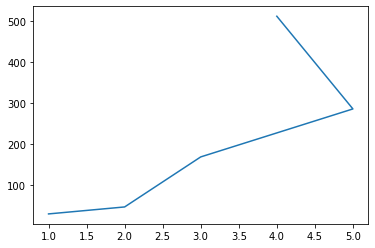

In [92]:
print("Observação da qualidade das relações familiares")
print(df.famrel.value_counts())
df.famrel.value_counts().plot()

Observação referente ao tempo livre dos alunos
3    408
4    293
2    171
5    108
1     64
Name: freetime, dtype: int64


<AxesSubplot:>

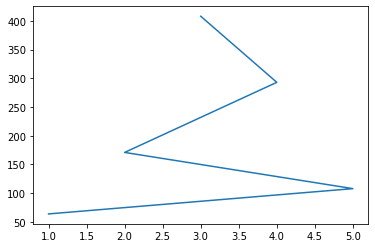

In [93]:
print("Observação referente ao tempo livre dos alunos")
print(df.freetime.value_counts())
df.freetime.value_counts().plot()

#### Será que alunos que tem uma qualidade baixa nas relações familiares, tem uma tendencia a ter notas baixas?

In [94]:
Dicionário_de_Dados

,Variavel,Descrição,Tipo
0,sex,sexo,categorica 0 - 1
1,age,idade,continua
2,famsize,tamanho da família; LE3 - famílias com no máxi...,categorica 0 - 1
3,Pstatus,status de habitação com os pais; T - mora junt...,categorica 0 - 1
4,traveltime,tempo de viagem entre escola e casa; 1 - <15 m...,categorica ordinal
5,studytime,"tempo de estudo semanal; 1 - <2 horas, 2 - 2 a...",categorica ordinal
6,schoolsup,suporte educacional extra escola,categorica 0 - 1
7,famsup,suporte educacional da família,categorica 0 - 1
8,paid,pagou aulas particulares por fora,categorica 0 - 1
9,activities,atividades extra-curriculares,categorica 0 - 1


            famrel           G3
count  1014.000000  1014.000000
mean      4.022682    11.362919
std       0.796388     3.863470
min       2.000000     0.000000
25%       4.000000    10.000000
50%       4.000000    11.000000
75%       5.000000    14.000000
max       5.000000    20.000000


<AxesSubplot:>

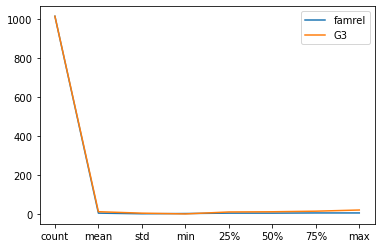

In [95]:
df_teste = df[['famrel', 'G3']]
print(df_teste[df_teste['famrel']!=1].describe())
df_teste[df_teste['famrel']!=1].describe().plot()

- O gráfico demonstra que a nota maxima obtida foi de 20
- Média 11.36
- Quartis 25 = 10
- Quartis 50 = 11
- Quartis 75 = 14

       famrel         G3
count    30.0  30.000000
mean      1.0  10.633333
std       0.0   3.908288
min       1.0   0.000000
25%       1.0   9.000000
50%       1.0  11.000000
75%       1.0  12.750000
max       1.0  17.000000


<AxesSubplot:>

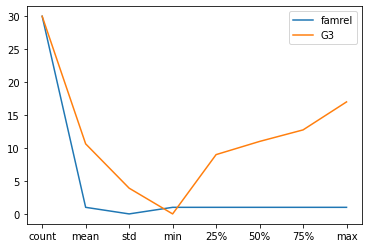

In [96]:
df_teste = df[['famrel', 'G3']]
print(df_teste[df_teste['famrel']==1].describe())
df_teste[df_teste['famrel']==1].describe().plot()

- O gráfico demonstra que a nota maxima obtida foi de 17
- Média 10.63
- Quartis 25 = 9
- Quartis 50 = 11
- Quartis 75 = 12.75

#### Em relação a qualidade das familias pode se dizer que o valor das avaliações tem uma queda quando a qualidade das relações familiares não são tão boas.

#### Será que um aluno que tem trajeto maior de deslocamento até a escola, tem mais chances de faltar a aula? Verifique se alguma variavel tem uma alteração de impacto no conjunto de dados?

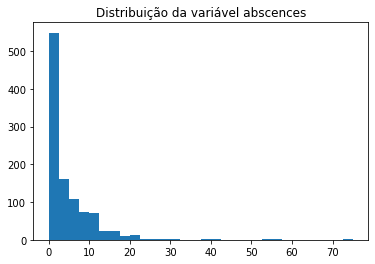

In [110]:
plt.hist(df.absences, bins = 30)
plt.title("Distribuição da variável abscences")
plt.show()

In [97]:
df_teste = df[['traveltime', 'absences', 'G3']]
df_teste.head()

,traveltime,absences,G3
0,2,6,6
1,1,4,6
2,1,10,10
3,1,2,15
4,1,4,10


             age  traveltime  studytime     famrel   freetime      goout  \
count  24.000000        24.0  24.000000  24.000000  24.000000  24.000000   
mean   16.333333         4.0   2.083333   4.125000   3.333333   3.750000   
std     1.129319         0.0   1.017955   1.115601   1.167184   1.390965   
min    15.000000         4.0   1.000000   1.000000   1.000000   1.000000   
25%    15.000000         4.0   1.000000   4.000000   3.000000   2.750000   
50%    16.000000         4.0   2.000000   4.000000   3.000000   4.500000   
75%    17.000000         4.0   3.000000   5.000000   4.000000   5.000000   
max    18.000000         4.0   4.000000   5.000000   5.000000   5.000000   

        absences         G3  
count  24.000000  24.000000  
mean    3.500000  10.166667  
std     4.263087   2.884240  
min     0.000000   0.000000  
25%     0.000000   9.750000  
50%     2.000000  10.000000  
75%     6.000000  11.000000  
max    14.000000  16.000000  


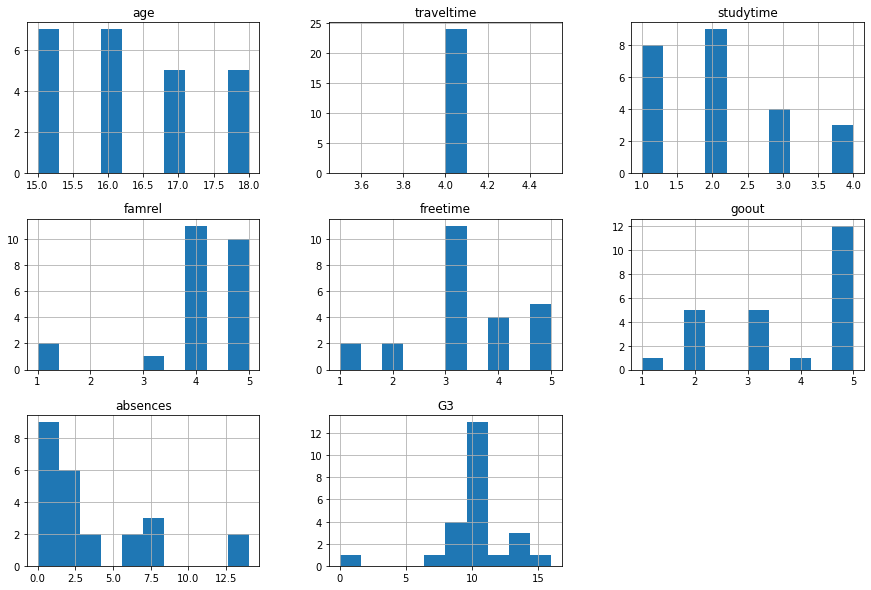

In [98]:
filtro = df[df['traveltime']==4]
print(filtro.describe())
filtro.hist(figsize=[15,10])
filtro2 = df[df['traveltime']==4].describe()

               age   traveltime    studytime       famrel     freetime  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean     16.735294     1.464706     1.967647     3.931373     3.198039   
std       1.241469     0.632556     0.829966     0.928872     1.028541   
min      15.000000     1.000000     1.000000     1.000000     1.000000   
25%      16.000000     1.000000     1.000000     4.000000     3.000000   
50%      17.000000     1.000000     2.000000     4.000000     3.000000   
75%      18.000000     2.000000     2.000000     5.000000     4.000000   
max      22.000000     3.000000     4.000000     5.000000     5.000000   

             goout     absences           G3  
count  1020.000000  1020.000000  1020.000000  
mean      3.142157     4.456863    11.369608  
std       1.143479     6.248305     3.881672  
min       1.000000     0.000000     0.000000  
25%       2.000000     0.000000    10.000000  
50%       3.000000     2.000000    11.000000  
75% 

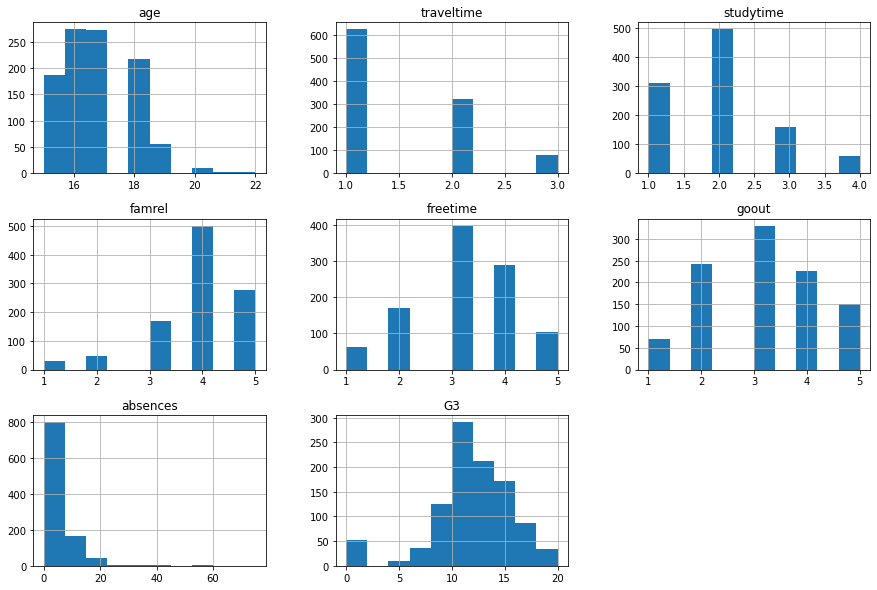

In [99]:
print(df[df['traveltime']!= 4].describe())
df[df['traveltime']!= 4].hist(figsize=[15,10])
absences_desc = df[df['traveltime']!= 4].describe()

In [100]:
absences_desc['absences']

count    1020.000000
mean        4.456863
std         6.248305
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64

In [101]:
filtro2['absences']

count    24.000000
mean      3.500000
std       4.263087
min       0.000000
25%       0.000000
50%       2.000000
75%       6.000000
max      14.000000
Name: absences, dtype: float64

#### Referente as faltas ao deslocamento dos alunos, não houve um aumento significativo no numero de faltas, houve um pequeno acrescimo no numero de faltas e nas notas dos alunos.

### Conclusôes

#### Referente a análise exploratória vimos que auguns valores estastisticos mudam de acordo com alguma manipulação no conjunto de dados, mas não encontramos algo representativo que demostre uma tendencia no conjunto de dados.

- Insights
- 56% do dataset é formado por pessoas do sexo feminino
- A idade está com uma concentração forte entre a idade de 15 a 19 anos
- cerca de 70%  das familias tem mais de 3 pessoas
- cerca de 80% dos alunos moram com os pais
- Concluimos que o deslocamento até a escola não imapacta nas notas, e não gera maior numero de faltas por parte dos alunos

#### Próximo passo é realizar um tratamento nas variaveis, realizar a normalização e encontrat um melhor conjunto de features para ter uma base representativa para treinar os modelos.

### Tratamento de variaveis

In [102]:
Dicionário_de_Dados[Dicionário_de_Dados['Tipo']=="categorica 0 - 1"]

,Variavel,Descrição,Tipo
0,sex,sexo,categorica 0 - 1
2,famsize,tamanho da família; LE3 - famílias com no máxi...,categorica 0 - 1
3,Pstatus,status de habitação com os pais; T - mora junt...,categorica 0 - 1
6,schoolsup,suporte educacional extra escola,categorica 0 - 1
7,famsup,suporte educacional da família,categorica 0 - 1
8,paid,pagou aulas particulares por fora,categorica 0 - 1
9,activities,atividades extra-curriculares,categorica 0 - 1
10,internet,acesso a internet em casa,categorica 0 - 1
11,romantic,se está num relacionamento,categorica 0 - 1


In [103]:
df.sex = df.sex.map({'M':0, 'F':1})
df.famsize = df.famsize.map({'GT3':0,'LE3':1})
df.Pstatus = df.Pstatus.map({'T':0,'A':1})
df.schoolsup = df.schoolsup.map({'yes':1,'no':0})
df.famsup = df.famsup.map({'yes':1,'no':0})
df.paid = df.paid.map({'yes':1,'no':0})
df.activities = df.activities.map({'yes':1,'no':0})
df.internet	 = df.internet	.map({'yes':1,'no':0})
df.romantic = df.romantic.map({'yes':1,'no':0})

In [104]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,1,18,0,1,2,2,1,0,0,0,0,0,4,3,4,6,6
1,1,17,0,0,1,2,0,1,0,0,1,0,5,3,3,4,6
2,1,15,1,0,1,2,1,0,1,0,1,0,4,3,2,10,10
3,1,15,0,0,1,3,0,1,1,1,1,1,3,2,2,2,15
4,1,16,0,0,1,2,0,1,1,0,0,0,4,3,2,4,10


In [105]:
df[0:15].T.head(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sex,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15
famsize,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0
Pstatus,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1
traveltime,2,1,1,1,1,1,1,2,1,1,1,3,1,2,1
studytime,2,2,2,3,2,2,2,2,2,2,2,3,1,2,3
schoolsup,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
famsup,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1
paid,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0
activities,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0


In [106]:
df.corr()['G3']

sex           0.031472
age          -0.125282
famsize       0.061209
Pstatus       0.030693
traveltime   -0.102627
studytime     0.161629
schoolsup    -0.079346
famsup        0.013313
paid         -0.049388
activities    0.033998
internet      0.107064
romantic     -0.098363
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

In [107]:
#df.isnull().sum()
#nulos

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         1044 non-null   int64
 1   age         1044 non-null   int64
 2   famsize     1044 non-null   int64
 3   Pstatus     1044 non-null   int64
 4   traveltime  1044 non-null   int64
 5   studytime   1044 non-null   int64
 6   schoolsup   1044 non-null   int64
 7   famsup      1044 non-null   int64
 8   paid        1044 non-null   int64
 9   activities  1044 non-null   int64
 10  internet    1044 non-null   int64
 11  romantic    1044 non-null   int64
 12  famrel      1044 non-null   int64
 13  freetime    1044 non-null   int64
 14  goout       1044 non-null   int64
 15  absences    1044 non-null   int64
 16  G3          1044 non-null   int64
dtypes: int64(17)
memory usage: 138.8 KB


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

### Pre Processamento dos Dados

In [123]:
def preprocessamento_completo(df, dataset_de_treino = True, std_scaler = None):

    dff = df.copy() # copia do dataset
    variaveis_para_normalizar = ['sex', 
                                 'age', 
                                 'famsize', 
                                 'Pstatus', 
                                 'traveltime', 
                                 'studytime', 
                                 'schoolsup', 
                                 'famsup', 
                                 'paid', 
                                 'activities', 
                                 'internet', 
                                 'romantic',
                                 'famrel', 
                                 'freetime', 
                                 'goout', 
                                 'absences']
 
    if dataset_de_treino:  

        #normalização
        sc = StandardScaler() #Intanciando o sc
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar]) #fitando
        
        X, y =  np.c_[variaveis_norm], dff.G3.values # Atribuindo valores de X e y nos dados de treino
        return X, y, sc
    
    else:
        
        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[variaveis_norm], dff.G3.values # Atribuindo valores de X e y nos dados de teste
        return X, y

In [125]:
Xtrain, ytrain, scaler_train  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         std_scaler = None)

In [126]:
Xtrain.shape, ytrain.shape, dftrain.shape

((783, 16), (783,), (783, 17))

In [127]:
Xtest, ytest = preprocessamento_completo(df = dftest, 
                                         dataset_de_treino = False, 
                                         std_scaler = scaler_train)

In [128]:
Xtest.shape, ytest.shape, dftest.shape

((261, 16), (261,), (261, 17))

### Treinamento de Modelos e Metricas de Performance

In [129]:
#algoritmos
from sklearn.linear_model import LinearRegression #Regressão Linear
from sklearn.neighbors import KNeighborsRegressor #KNN
from sklearn.tree import DecisionTreeRegressor #Arvore de Decisão

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [131]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [132]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

3.8297761509315533

In [133]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.10253004022064438

In [134]:
# knn
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos: 
    knn = KNeighborsRegressor(n_neighbors = n) #Instanciando e colocando o numero de vizinhos
    knn.fit(Xtrain, ytrain) #treino
    
    preds = knn.predict(Xtrain) #predição
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds) #RMSE
    r2_train = r2_score(y_true = ytrain, y_pred = preds) #R2
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.89 / R2: 0.95
K = 2 | RMSE:2.53 / R2: 0.61
K = 5 | RMSE:3.35 / R2: 0.31
K = 10 | RMSE:3.6 / R2: 0.21
K = 20 | RMSE:3.73 / R2: 0.15
K = 50 | RMSE:3.81 / R2: 0.11


In [135]:
# Arvore de Decisão
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.62 / R2: 0.2
Profundidade da árvore = 10 | RMSE:2.28 / R2: 0.68
Profundidade da árvore = 100 | RMSE:0.72 / R2: 0.97


In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.02937724 0.07748673 0.0741386  0.02113745 0.06464084]
media:  0.05335617289560901
desvio padrão:  0.023471567322450333


In [138]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

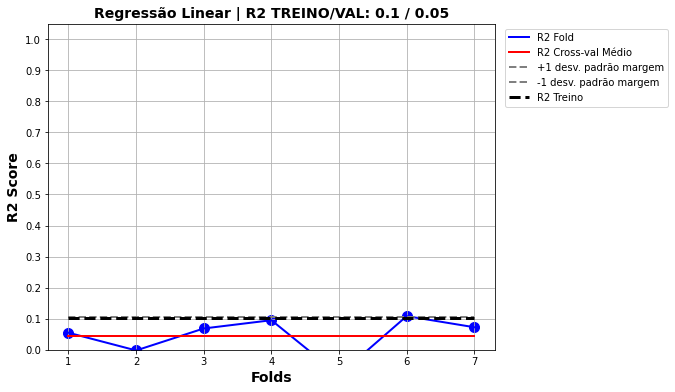

In [156]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 7)

## Não conseguiu descrever bem os dados

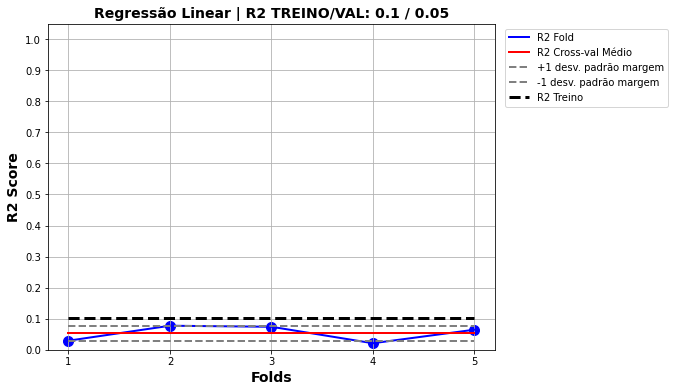

In [155]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

## Conseguiu descrever bem os dados, mesmo com o valor entre treino e validação estarem bem diferentes

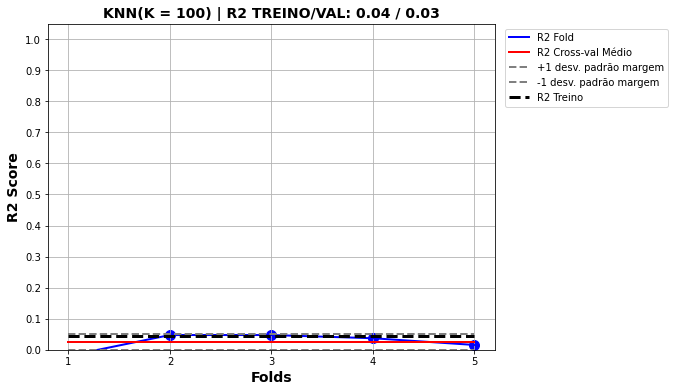

In [170]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 200),
                           nome_modelo = 'KNN(K = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

## Modelo que obteve melhor desempenho

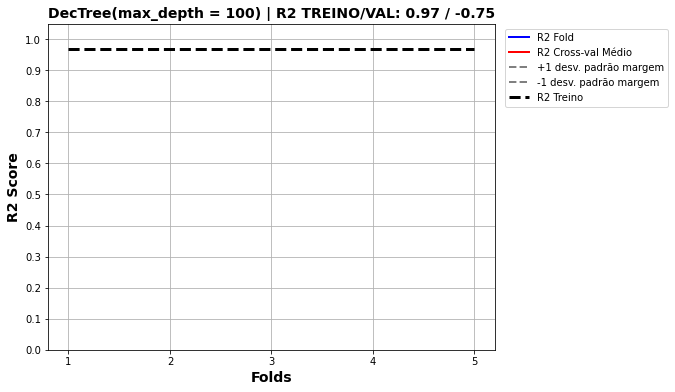

In [150]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

## Não conseguiu descrever bem os dados

- Modelo que melhor descreveu os dados foi o de KNeighborsRegressor(n_neighbors = 200), apesar do erro ser alto, ele foi o modelo que mais se aproximou dos dados de treino e não ficou com valores muito diferentes como o knn e o de arvore de decisão

In [171]:
modelo_final = KNeighborsRegressor(n_neighbors = 200)
modelo_final.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=200)

In [172]:
preds_modelo_final = modelo_final.predict(Xtest)

In [173]:
#R2 em teste

r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.06596880422402174

In [174]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

3.1418490754692243

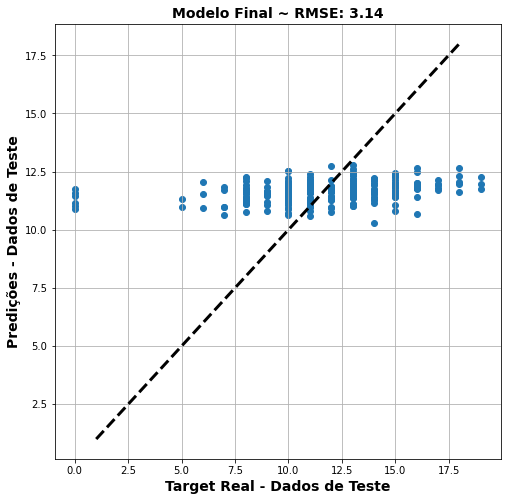

In [175]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()